# **Data Collection & Preprocessing**

### Load Data

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### EDA

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Dataset/Ecommerce/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 541909
Number of columns: 8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
missing_values = df.isnull().sum()
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [9]:
total_missing_value = missing_values.sum()
print(total_missing_value)

136534


### Data Cleaning

In [10]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [11]:
df.duplicated().sum()

5268

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
print(f"Jumlah duplikasi setelah dihapus: {df.duplicated().sum()}")

Jumlah duplikasi setelah dihapus: 0


In [14]:
df['CustomerID'].fillna('Unknown', inplace=True)

<ipython-input-14-c5ae8d4ef2d4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerID'].fillna('Unknown', inplace=True)
<ipython-input-14-c5ae8d4ef2d4>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['CustomerID'].fillna('Unknown', inplace=True)


### Total Price

In [15]:
df['total_price'] = df['Quantity'] * df['UnitPrice']

In [17]:
print(df[['Quantity', 'UnitPrice', 'total_price']].head())

   Quantity  UnitPrice  total_price
0         6       2.55        15.30
1         6       3.39        20.34
2         8       2.75        22.00
3         6       3.39        20.34
4         6       3.39        20.34


In [18]:
print(df[df['total_price'] < 0].head())

    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice CustomerID         Country  total_price  
141 2010-12-01 09:41:00      27.50    14527.0  United Kingdom       -27.50  
154 2010-12-01 09:49:00       4.65    15311.0  United Kingdom        -4.65  
235 2010-12-01 10:24:00       1.65    17548.0  United Kingdom       -19.80  
236 2010-12-01 10:24:00       0.29    17548.0  United Kingdom        -6.96  
237 2010-12-01 10:24:00       0.29    17548.0  United Kingdom        -6.96  


In [19]:
df = df[df['total_price'] >= 0]     # hapus yang negatif
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# **Analisis Tren Penjualan**

### Analisis Penjualan Bulanan

In [24]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['month'] = df['InvoiceDate'].dt.to_period('M')

<ipython-input-24-c18d44513d88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
<ipython-input-24-c18d44513d88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['InvoiceDate'].dt.to_period('M')


In [26]:
monthly_sales = df.groupby('month')['total_price'].sum().reset_index()
monthly_sales

,month,total_price
0,2010-12,821452.730
1,2011-01,689811.610
2,2011-02,522545.560
3,2011-03,716215.260
4,2011-04,536968.491
5,2011-05,769296.610
6,2011-06,760547.010
7,2011-07,718076.121
8,2011-08,757841.380
9,2011-09,1056435.192


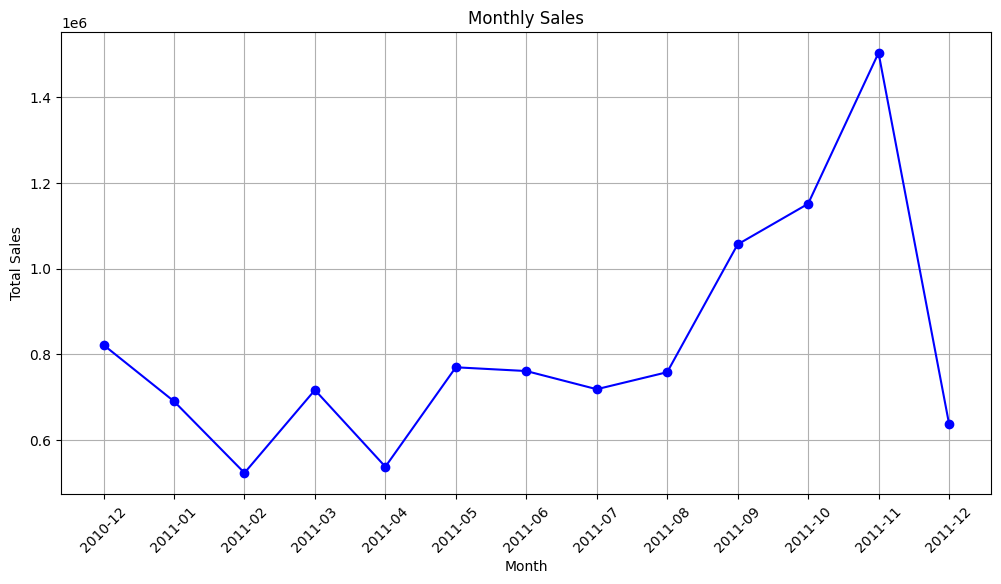

In [33]:
# Visualisasi
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'].astype(str), monthly_sales['total_price'], marker='o', linestyle='-', color='b')

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Produk Terlaris

In [38]:
top_product = df.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()
top_product = top_product.sort_values(by='Quantity', ascending=False)
top_product.head(10)

,StockCode,Description,Quantity
2939,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2365,23166,MEDIUM CERAMIC TOP STORAGE JAR,78033
3165,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951
4346,85099B,JUMBO BAG RED RETROSPOT,48375
4359,85123A,WHITE HANGING HEART T-LIGHT HOLDER,37584
1240,22197,POPCORN HOLDER,36749
440,21212,PACK OF 72 RETROSPOT CAKE CASES,36396
3284,84879,ASSORTED COLOUR BIRD ORNAMENT,36362
2251,23084,RABBIT NIGHT LIGHT,30739
1537,22492,MINI PAINT SET VINTAGE,26633


### Pola Pembelian Pelanggan

In [40]:
customer_freq = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
customer_freq = customer_freq.sort_values(by='InvoiceNo', ascending=False)  # Urutkan dari yang terbanyak
customer_freq.head(10)

,CustomerID,InvoiceNo
4339,Unknown,3526
326,12748.0,210
1880,14911.0,201
4011,17841.0,124
562,13089.0,97
1662,14606.0,93
2177,15311.0,91
481,12971.0,86
1690,14646.0,74
2703,16029.0,63


<ipython-input-42-4acc38ab9a63>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='CustomerID', y='InvoiceNo', palette='coolwarm')


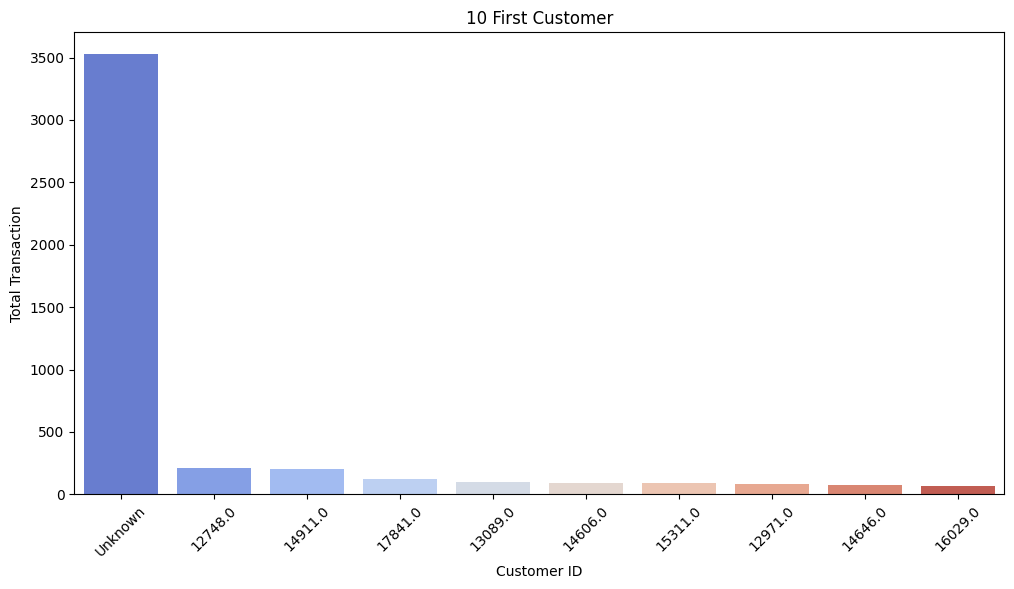

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

top_customers = customer_freq.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_customers, x='CustomerID', y='InvoiceNo', palette='coolwarm')

plt.xlabel('Customer ID')
plt.ylabel('Total Transaction')
plt.title('10 First Customer')
plt.xticks(rotation=45)
plt.show()

# **Analisis Keuangan**

### AOV - Average Order Value

In [43]:
total_revenue = df['total_price'].sum()
total_orders = df['InvoiceNo'].nunique()
average_order_value = total_revenue / total_orders

print(average_order_value)

482.3728947511556


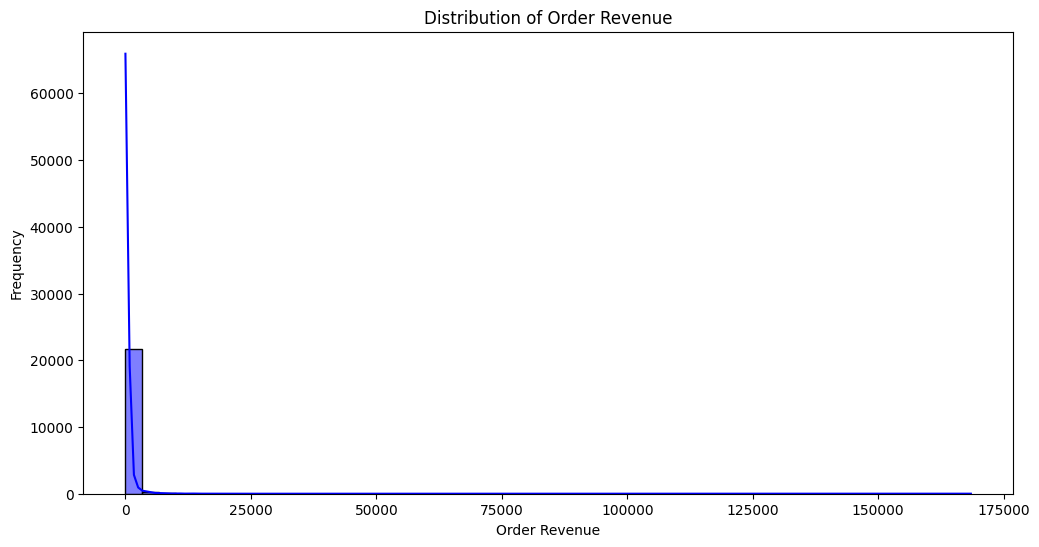

In [46]:
order_revenue = df.groupby('InvoiceNo')['total_price'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.histplot(order_revenue['total_price'], bins=50, color='b', kde=True)

plt.xlabel('Order Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Order Revenue')
plt.show()

In [47]:
aov_country = df.groupby('Country').agg(
    total_revenue=('total_price', 'sum'),
    total_orders=('InvoiceNo', 'nunique')
).reset_index()

aov_country['AOV'] = aov_country['total_revenue'] / aov_country['total_orders']
aov_country = aov_country.sort_values(by='AOV', ascending=False)

print(aov_country.head(10))

        Country  total_revenue  total_orders          AOV
30    Singapore       21279.29             7  3039.898571
24  Netherlands      285446.34            95  3004.698316
0     Australia      138453.81            57  2429.014211
20        Japan       37416.37            19  1969.282632
21      Lebanon        1693.88             1  1693.880000
16    Hong Kong       15483.00            11  1407.545455
4        Brazil        1143.60             1  1143.600000
32       Sweden       38367.83            36  1065.773056
33  Switzerland       57067.60            54  1056.807407
9       Denmark       18955.34            18  1053.074444


<ipython-input-48-412664b7ed21>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='AOV', y='Country', palette='coolwarm')


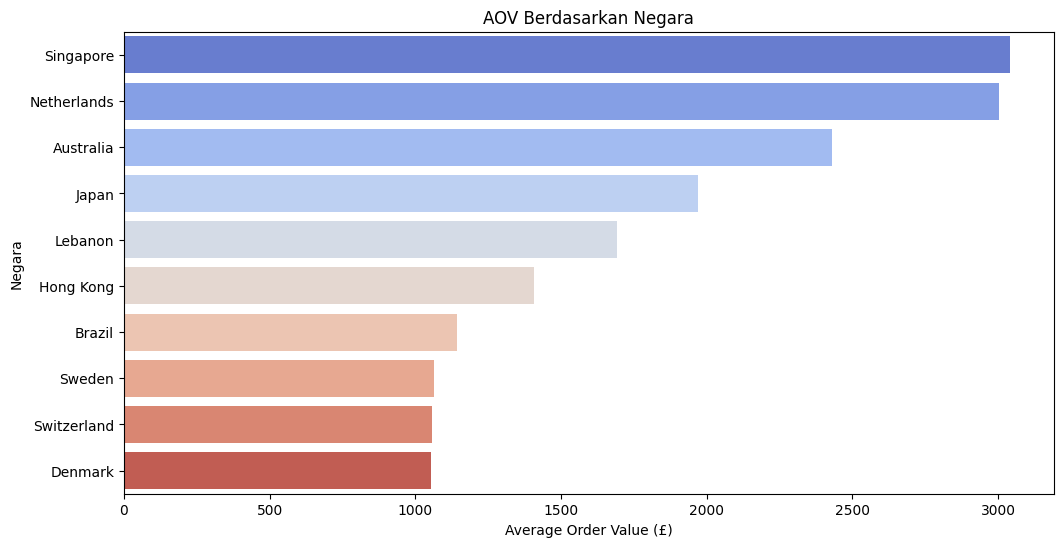

In [48]:
top_countries = aov_country.head(10)  # Ambil 10 negara dengan AOV tertinggi

plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='AOV', y='Country', palette='coolwarm')

plt.xlabel('Average Order Value (£)')
plt.ylabel('Negara')
plt.title('AOV Berdasarkan Negara')
plt.show()

# **Customer Segmentation (Optional - Tingkat Lanjut)**

### RFM (Recency, Frequency, Monetary) Analysis

In [50]:
import datetime

reference_date = df['InvoiceDate'].max()
reference_date

Timestamp('2011-12-09 12:50:00')

In [51]:
rfm = df.groupby('CustomerID').agg(
    recency=('InvoiceDate', lambda x: (reference_date - x.max()).days),
    frequency=('InvoiceNo', 'nunique'),
    monetary=('total_price', 'sum')
).reset_index()

rfm.head()

,CustomerID,recency,frequency,monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


In [52]:
from sklearn.preprocessing import StandardScaler

rfm_features = rfm[['recency', 'frequency', 'monetary']]

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

In [53]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
rfm['cluster'] = dbscan.fit_predict(rfm_scaled)

In [54]:
rfm['cluster'].value_counts()

,count
cluster,
0,4333
-1,7


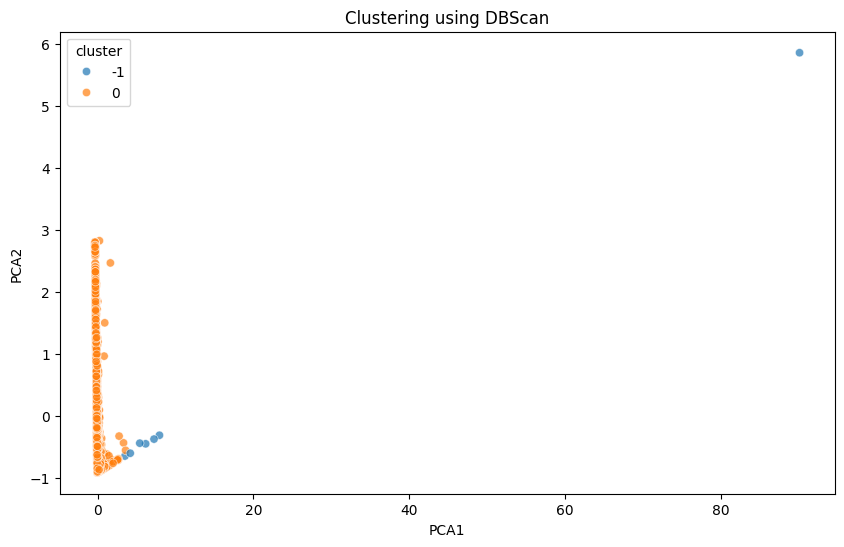

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

rfm['PCA1'] = rfm_pca[:, 0]
rfm['PCA2'] = rfm_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rfm,
    x='PCA1',
    y='PCA2',
    hue='cluster',
    palette='tab10',
    alpha =0.7
    )
plt.title('Clustering using DBScan')
plt.show()

### Outlier Analysis

In [57]:
outlier_data = rfm[rfm['cluster'] == -1]
print(outlier_data)

     CustomerID  recency  frequency    monetary  cluster       PCA1      PCA2
326     12748.0        0        210    33053.19       -1   3.512521 -0.651729
1690    14646.0        1         74   280206.02       -1   7.942660 -0.315942
1880    14911.0        0        201   143711.17       -1   6.173878 -0.454287
3009    16446.0        0          2   168472.50       -1   4.197482 -0.605853
3729    17450.0        7         46   194390.79       -1   5.417577 -0.443985
4202    18102.0        0         60   259657.30       -1   7.244598 -0.378151
4339    Unknown        0       3526  1754901.91       -1  90.046653  5.854789


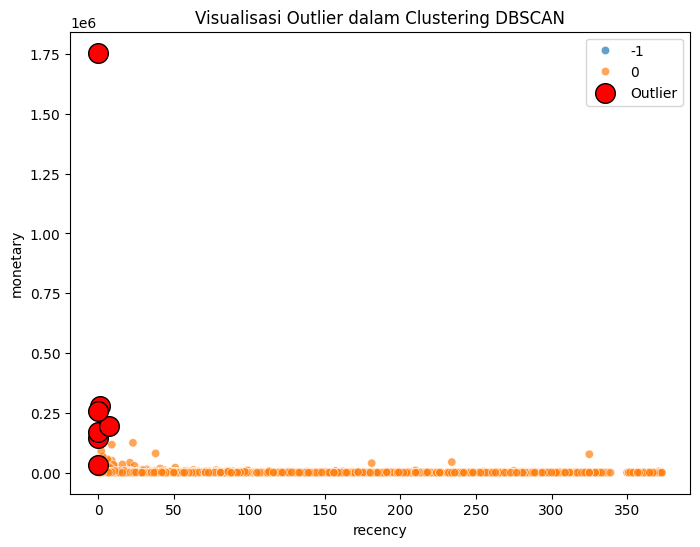

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm, x='recency', y='monetary', hue='cluster', palette='tab10', alpha=0.7)
plt.scatter(outlier_data['recency'], outlier_data['monetary'], color='red', s=200, label="Outlier", edgecolors='black')
plt.legend()
plt.title("Visualisasi Outlier dalam Clustering DBSCAN")
plt.show()


### Remove Outlier

In [64]:
rfm_no_outlier = rfm[rfm['cluster'] != -1]

<ipython-input-65-8bbb51928f7b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_no_outlier['PCA1'] = rfm_pca_no_outlier[:, 0]
<ipython-input-65-8bbb51928f7b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_no_outlier['PCA2'] = rfm_pca_no_outlier[:, 1]


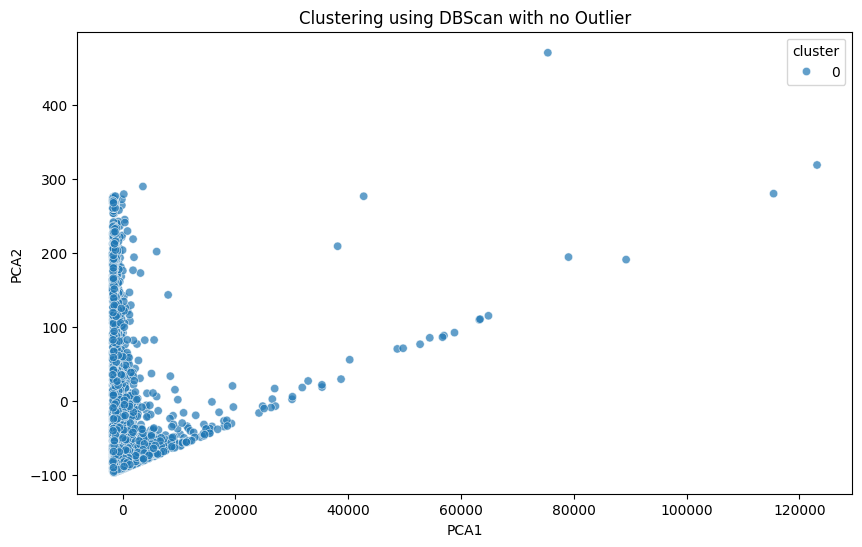

In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
rfm_pca_no_outlier = pca.fit_transform(rfm_no_outlier[['recency', 'frequency', 'monetary']])

rfm_no_outlier['PCA1'] = rfm_pca_no_outlier[:, 0]
rfm_no_outlier['PCA2'] = rfm_pca_no_outlier[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rfm_no_outlier,
    x='PCA1',
    y='PCA2',
    hue='cluster',
    palette='tab10',
    alpha =0.7
    )
plt.title('Clustering using DBScan with no Outlier')
plt.show()